In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
today=datetime.now().strftime("%Y-%m-%d")

data = yf.download("BTC-USD", start="2020-01-01",end=today)

# Fiyatları kullanma
data = data[['Close']]

# Verileri ölçekleme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Eğitim verilerini oluşturma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [18]:


# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))  # Daha fazla nöron
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))  # Ekstra LSTM katmanı
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma için callback oluşturma
early_stopping = EarlyStopping(monitor='loss', patience=5)

# Modeli eğitme
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100


c:\Users\berat\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0323
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0038
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0033
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0032
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0038
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0023
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0024
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0021
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0020
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0021
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0019
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0020
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0020
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0019
E

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


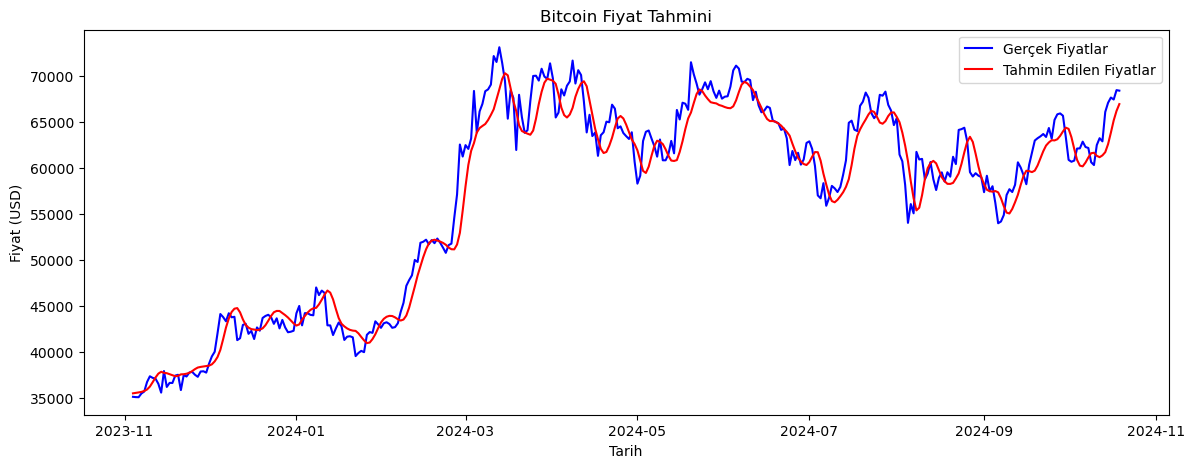

Ortalama Kare Hata (MSE): 5333749.50
Karekök Ortalama Kare Hata (RMSE): 2309.49
R² Değeri: 0.95
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Gelecek 1 haftalık Bitcoin fiyat tahminleri:
Tarih: 2024-10-20, Tahmin Edilen Fiyat: 67312.87 USD
Tarih: 2024-10-21, Tahmin Edilen Fiyat: 67240.07 USD
Tarih: 2024-10-22, Tahmin Edilen Fiyat: 66848.54 USD
Tarih: 2024-10-23, Tahmin Edilen Fiyat: 66290.03 USD
Tarih: 2024-10-24, Tahmin Edilen Fiyat: 65667.01 USD
Tarih: 2024-10-25, Tahmin Edilen Fiyat: 65040.16 USD
Tarih: 2024-10-26, Tahmin Edilen Fiyat: 64443.70 USD

En son gerçek kapanış fiyatı: 68362.73 USD


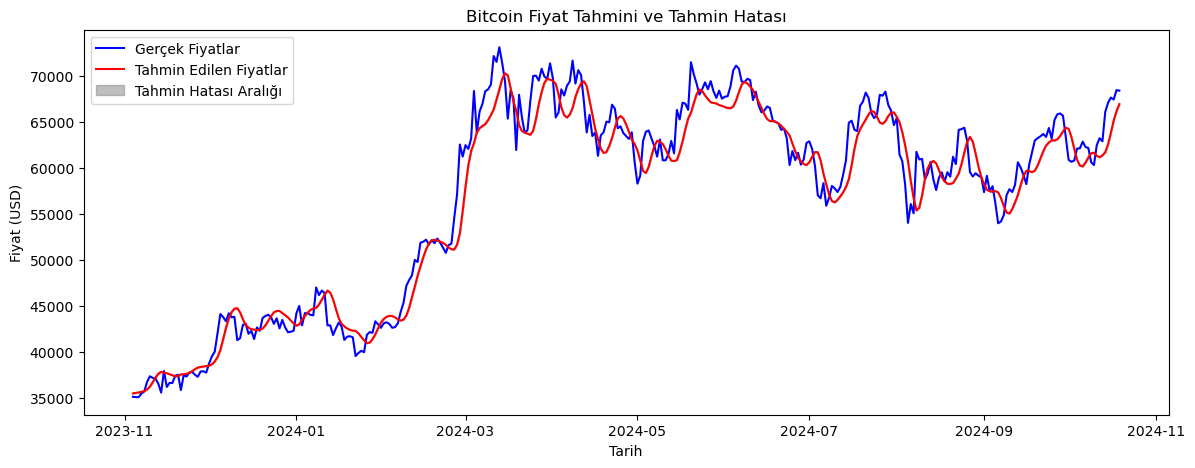

In [19]:

# Test verileri oluşturma
test_data = scaled_data[train_size - 60:]
x_test, y_test = [], data['Close'][train_size:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Tahmin yapma
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Sonuçları görselleştirme
plt.figure(figsize=(14, 5))
plt.plot(data.index[train_size:], y_test, color='blue', label='Gerçek Fiyatlar')
plt.plot(data.index[train_size:], predictions, color='red', label='Tahmin Edilen Fiyatlar')
plt.title('Bitcoin Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

# Tahmin hatası hesaplama
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Karekök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"R² Değeri: {r2:.2f}")

# 1 haftalık tahmin yapma
last_60_days = scaled_data[-60:]  # En son 60 gün verisi
last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

future_predictions = []
for _ in range(7):  # 7 gün için tahmin yap
    next_price = model.predict(last_60_days)
    future_predictions.append(next_price[0][0])  # Tahmin edilen fiyatı al
    # Boyutları uygun hale getirme
    next_price = np.reshape(next_price, (1, 1, 1))  # (1, 1, 1) şeklinde şekillendir
    last_60_days = np.append(last_60_days[:, 1:, :], next_price, axis=1)  # Son 60 gün verisine yeni tahmin ekle

# Tahminleri ters ölçeklendir
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Tahmin edilen fiyatları ve tarihleri yazdırma
today = datetime.today()
print("Gelecek 1 haftalık Bitcoin fiyat tahminleri:")
for i in range(7):
    predicted_date = today + timedelta(days=i)
    print(f"Tarih: {predicted_date.strftime('%Y-%m-%d')}, Tahmin Edilen Fiyat: {future_predictions[i][0]:.2f} USD")

# En son gerçek kapanış fiyatını gösterme
latest_close_price = data['Close'].iloc[-1]
print(f"\nEn son gerçek kapanış fiyatı: {latest_close_price:.2f} USD")

# Tahmin hatalarının görselleştirilmesi
plt.figure(figsize=(14, 5))
plt.plot(data.index[train_size:], y_test, color='blue', label='Gerçek Fiyatlar')
plt.plot(data.index[train_size:], predictions, color='red', label='Tahmin Edilen Fiyatlar')
plt.fill_between(data.index[train_size:], predictions.flatten() - 0.1, predictions.flatten() + 0.1, color='gray', alpha=0.5, label='Tahmin Hatası Aralığı')
plt.title('Bitcoin Fiyat Tahmini ve Tahmin Hatası')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()
